In [1]:
%matplotlib inline
from preamble import *

# 教師あり学習

## 教師あり機械学習アルゴリズム 

X.shape: (26, 2)


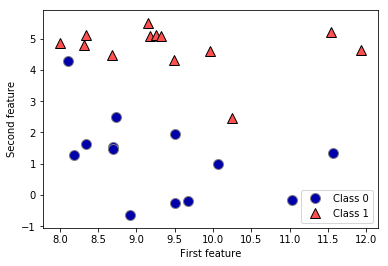

In [6]:
# データセットの生成
X, y = mglearn.datasets.make_forge()
# データセットをプロット
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

    X.shapeからわかるように、このデータセットは、2つの特徴量を持つ26のデータポイントで構成されている。
    
    numpty配列のスライス
    [行:列]でスライスでき、省略した場合はすべてを指定したことになる。[:, 0]は全ての行の0列名を取得することになる。

### k-最近傍法

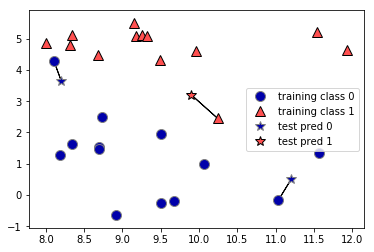

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

1-最近傍法アルゴリズムの予測では、近傍点のラベルが予測されたラベルになる。近傍点は1つとは限らず、任意個の、つまりk個の近傍点を考慮することができる。1つ以上の近傍点を考慮に入れる場合には、投票でラベルを決める。k-最近某点の多数派のクラスを採用する。 

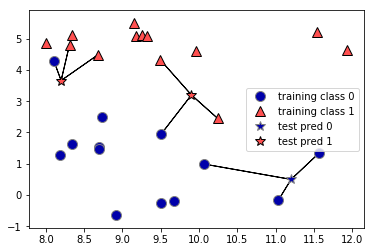

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [10]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [13]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [14]:
print("Test set predicitions: {}".format(clf.predict(X_test)))

Test set predicitions: [1 0 1 0 1 0 0]


In [16]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


アルゴリズムがクラス0に割り当てる場合と、クラス1に割り当てる場合の`決定境界`(decition boundary)を描画する。

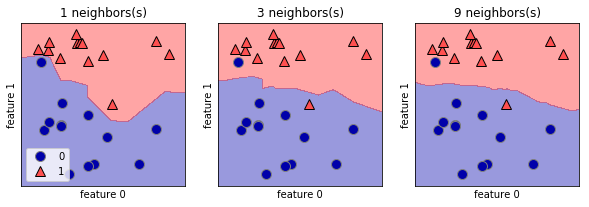

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

1 neighborsの場合、決定境界は、訓練データに近くなる。より多くの最近傍点を考慮すると、決定境界はよりなめらかになる。

### 線形モデル 

w[0]: 0.393906  b: -0.031804


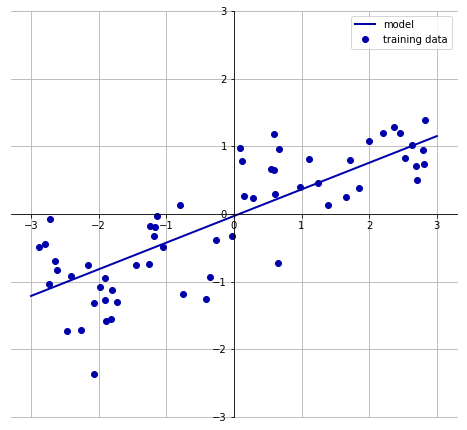

In [18]:
mglearn.plots.plot_linear_regression_wave()

#### 線形回帰 (通常最小二乗法)

線形回帰では、訓練データにおいて、予測と真の回帰ターゲットyとの`平均二乗誤差` (mean squared error)が最小になるように、パラメータwとbを求める。

In [19]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

傾きを表すパラメータ(w)は、重み、もしくは係数 (coefficient) と呼ばれ、`coef_属性`に格納される。オフセットもしくは切片 (intercept, b) は、`intercept_属性`に格納される。

In [21]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [22]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


より複雑なデータセット(boston_housing)で確認する。

In [23]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [24]:
print("Trainning set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Trainning set score: 0.95
Test set score: 0.61


訓練セットとテストセットで性能が大きくことなるのは、過剰適合が起きている兆候といえる。

#### リッジ回帰